connect to database successfully
CellName=WSPTMW2167
StartDate("YYYY-MM-DD")=2018-01-01


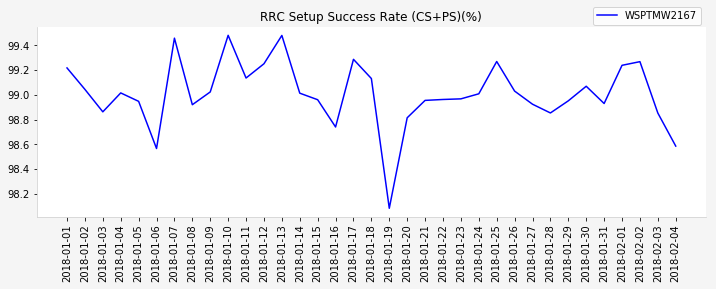

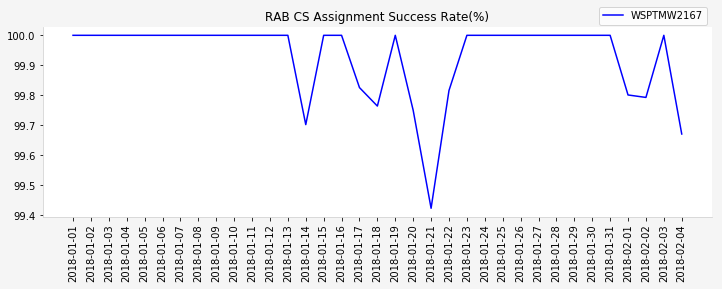

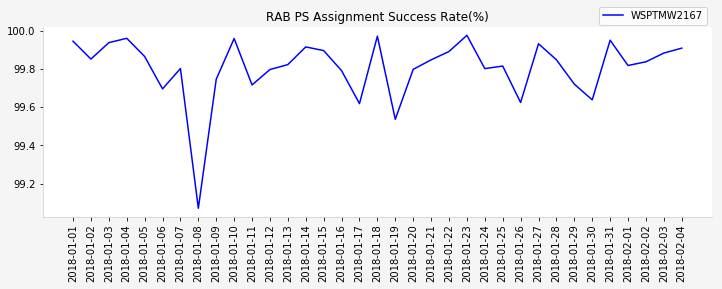

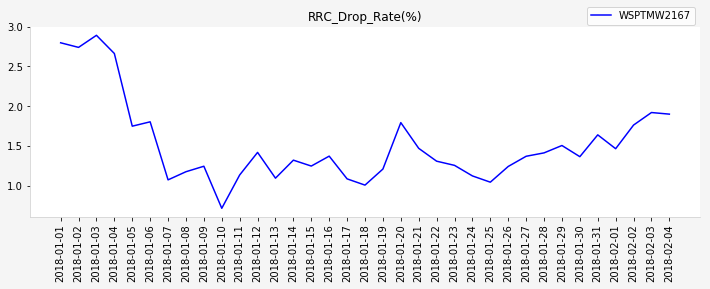

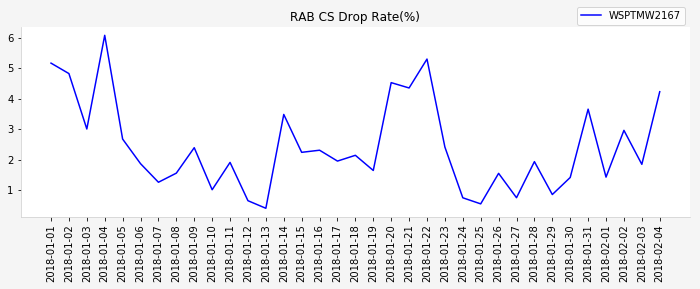

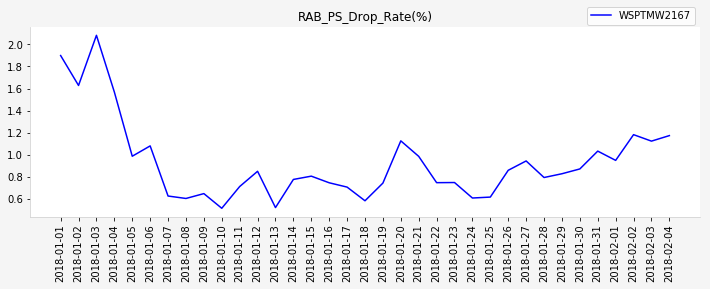

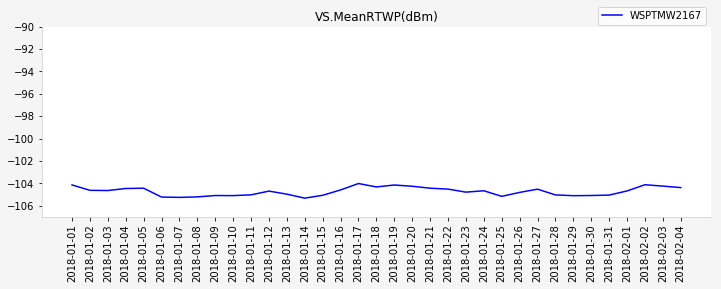

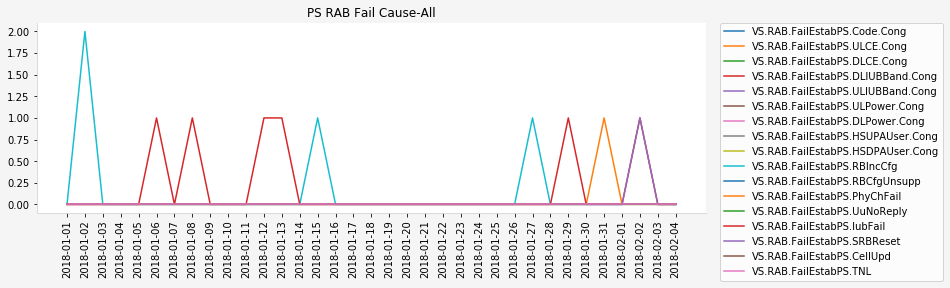

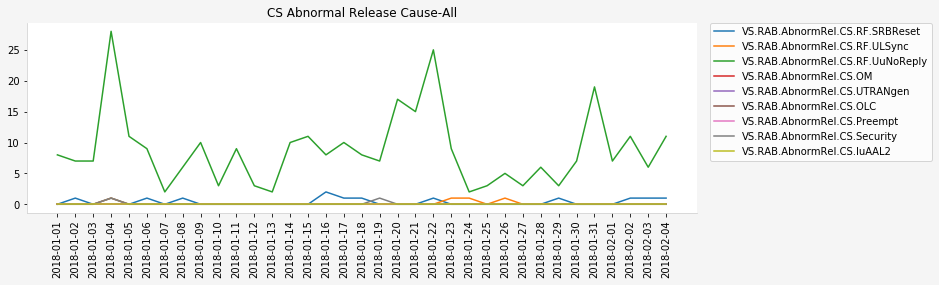

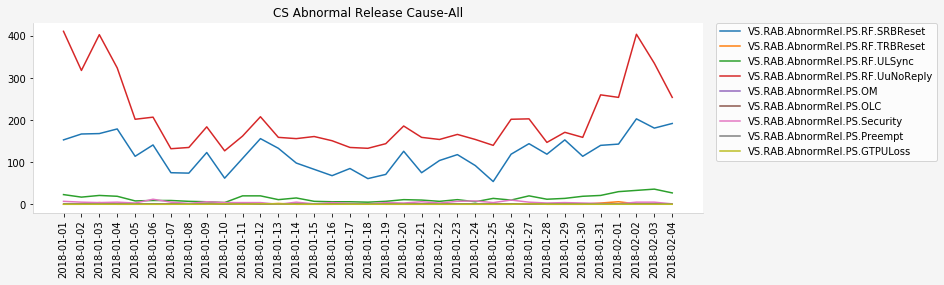

In [15]:
#按UMTS小区名称进行查询并显示KPI图形
import pymysql.cursors
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline

connection = pymysql.connect(host='localhost',
                             user='Test',
                             password='1234',
                             db='sts',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
if connection:
    print("connect to database successfully")
    
try:
    with connection.cursor() as cursor:
        # Read a single record
        CELLNAME=input("CellName=")
        CELLNAME=CELLNAME.strip().upper()
        StartDate=input("StartDate(\"YYYY-MM-DD\")=")
        StartDate=StartDate.strip()
        sql =("SELECT * FROM `daily_cell_sts_5.2` WHERE Time>= \'"+StartDate+"\'and CELLNAME=\'"+CELLNAME+"\' ORDER BY Time ASC")
        cursor.execute(sql)
        result1 = cursor.fetchall()
        if not result1:
            print("Query result is empty")
except:
    print("Error occured when querying")
finally:
    connection.close()

KPI=['RRC Setup Success Rate (CS+PS)(%)',
     'RAB CS Assignment Success Rate(%)',
     'RAB PS Assignment Success Rate(%)',
     'RRC_Drop_Rate(%)',
     'RAB CS Drop Rate(%)',
     'RAB_PS_Drop_Rate(%)',
     'VS.MeanRTWP(dBm)']
  
PS_RAB_FAIL=['VS.RAB.FailEstabPS.Code.Cong',
              'VS.RAB.FailEstabPS.ULCE.Cong',
              'VS.RAB.FailEstabPS.DLCE.Cong',
              'VS.RAB.FailEstabPS.DLIUBBand.Cong',
              'VS.RAB.FailEstabPS.ULIUBBand.Cong',
              'VS.RAB.FailEstabPS.ULPower.Cong',
              'VS.RAB.FailEstabPS.DLPower.Cong',
              'VS.RAB.FailEstabPS.HSUPAUser.Cong',
              'VS.RAB.FailEstabPS.HSDPAUser.Cong',
              'VS.RAB.FailEstabPS.RBIncCfg',
              'VS.RAB.FailEstabPS.RBCfgUnsupp',
              'VS.RAB.FailEstabPS.PhyChFail',
              'VS.RAB.FailEstabPS.UuNoReply',
              'VS.RAB.FailEstabPS.IubFail',
              'VS.RAB.FailEstabPS.SRBReset',
              'VS.RAB.FailEstabPS.CellUpd',
              'VS.RAB.FailEstabPS.TNL']

CS_DROP_CAUSE=['VS.RAB.AbnormRel.CS.RF.SRBReset',
               'VS.RAB.AbnormRel.CS.RF.ULSync',
               'VS.RAB.AbnormRel.CS.RF.UuNoReply',
               'VS.RAB.AbnormRel.CS.OM',
               'VS.RAB.AbnormRel.CS.UTRANgen',
               'VS.RAB.AbnormRel.CS.OLC',
               'VS.RAB.AbnormRel.CS.Preempt',
               'VS.RAB.AbnormRel.CS.Security',
               'VS.RAB.AbnormRel.CS.IuAAL2']

PS_DROP_CAUSE=['VS.RAB.AbnormRel.PS.RF.SRBReset',
               'VS.RAB.AbnormRel.PS.RF.TRBReset',
               'VS.RAB.AbnormRel.PS.RF.ULSync',
               'VS.RAB.AbnormRel.PS.RF.UuNoReply',
               'VS.RAB.AbnormRel.PS.OM',
               'VS.RAB.AbnormRel.PS.OLC',
               'VS.RAB.AbnormRel.PS.Security',
               'VS.RAB.AbnormRel.PS.Preempt',
               'VS.RAB.AbnormRel.PS.GTPULoss']

if result1:
    df=pd.DataFrame(result1)
    fig_number=0
    Time_range=df['Time'].values.tolist()
    for x in KPI:
        fig_number=+1
        plt.figure(fig_number)
        plt.figure(figsize=(12,3.5),facecolor='whitesmoke')
        ax=plt.subplot(111)
        ax.plot(Time_range,df[x],'b-',label=CELLNAME)
        ax.set(title=x)
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  #设置日期间隔为1天
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.set_xticks(Time_range)   #设置X轴日期显示范围
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color('lightgrey')  
        ax.spines['left'].set_color('lightgrey')  
        ax.legend(bbox_to_anchor=(1,1.13),loc='upper right')
        if x=='VS.MeanRTWP(dBm)':
            ax.set_ylim((-107,-90))
        plt.xticks(rotation=90)

    #PS_RAB_ESTABLISHMENT FAILURE CAUSE   
    fig_number=+1
    plt.figure(fig_number)
    plt.figure(figsize=(12,3.5),facecolor='whitesmoke')
    ax_ps_rab=plt.subplot(111)
    for ps_cause in PS_RAB_FAIL:
        ax_ps_rab.plot(Time_range,df[ps_cause],'-',label=ps_cause)
    ax_ps_rab.set(title='PS RAB Fail Cause-All')
    ax_ps_rab.xaxis.set_major_locator(mdates.DayLocator(interval=1))  #设置日期间隔为1天
    ax_ps_rab.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax_ps_rab.set_xticks(Time_range)   #设置X轴日期显示范围
    ax_ps_rab.spines['top'].set_visible(False)  
    ax_ps_rab.spines['right'].set_visible(False)
    ax_ps_rab.spines['bottom'].set_color('lightgrey')  
    ax_ps_rab.spines['left'].set_color('lightgrey')  
    ax_ps_rab.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=90)
    
    #CS ABNORMAL RELEASE CAUSE   
    fig_number=+1
    plt.figure(fig_number)
    plt.figure(figsize=(12,3.5),facecolor='whitesmoke')
    ax_cs_drop=plt.subplot(111)
    for cs_drop_cause in CS_DROP_CAUSE:
        ax_cs_drop.plot(Time_range,df[cs_drop_cause],'-',label=cs_drop_cause)
    ax_cs_drop.set(title='CS Abnormal Release Cause-All')
    ax_cs_drop.xaxis.set_major_locator(mdates.DayLocator(interval=1))  #设置日期间隔为1天
    ax_cs_drop.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax_cs_drop.set_xticks(Time_range)   #设置X轴日期显示范围
    ax_cs_drop.spines['top'].set_visible(False)  
    ax_cs_drop.spines['right'].set_visible(False)
    ax_cs_drop.spines['bottom'].set_color('lightgrey')  
    ax_cs_drop.spines['left'].set_color('lightgrey')  
    ax_cs_drop.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=90)
    
    #PS ABNORMAL RELEASE CAUSE   
    fig_number=+1
    plt.figure(fig_number)
    plt.figure(figsize=(12,3.5),facecolor='whitesmoke')
    ax_ps_drop=plt.subplot(111)
    for ps_drop_cause in PS_DROP_CAUSE:
        ax_ps_drop.plot(Time_range,df[ps_drop_cause],'-',label=ps_drop_cause)
    ax_ps_drop.set(title='CS Abnormal Release Cause-All')
    ax_ps_drop.xaxis.set_major_locator(mdates.DayLocator(interval=1))  #设置日期间隔为1天
    ax_ps_drop.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax_ps_drop.set_xticks(Time_range)   #设置X轴日期显示范围
    ax_ps_drop.spines['top'].set_visible(False)  
    ax_ps_drop.spines['right'].set_visible(False)
    ax_ps_drop.spines['bottom'].set_color('lightgrey')  
    ax_ps_drop.spines['left'].set_color('lightgrey')  
    ax_ps_drop.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=90)
plt.show()

